<div style="text-align: center;
            font-size: 48px;
            font-family: 'Open Sans', sans-serif;
            font-optical-sizing: auto;
            font-weight: 800;
            font-style: normal;
            font-variation-settings: 'wdth' 100;
            color: #3a7bd5;
            -webkit-background-clip: text;
            background-clip: text;
            text-fill-color: transparent;
            padding: 20px;
            text-shadow: 0 2px 4px rgba(0,0,0,0.1);
            letter-spacing: 1.5px;
            margin: 20px 0;">
Recommendation system
</div>

<link href="https://fonts.googleapis.com/css2?family=Open+Sans:ital,wght@0,800;1,800&display=swap" rel="stylesheet">

In [7]:
from recommendation import RecommendationSystem
import numpy as np

### Algorithm operation on test data

In [8]:
def point_generate():
    cluster1_x = np.random.normal(2, 0.5, 50)  # среднее=2, std=0.3, 50 точек
    cluster1_y = np.random.normal(3, 1, 50)

    cluster2_x = np.random.normal(6, 1, 50)
    cluster2_y = np.random.normal(5, 1, 50)
    result1 = np.array([[x, y] for x, y in zip(cluster1_x, cluster1_y)])
    result2 = np.array([[x, y] for x, y in zip(cluster2_x, cluster2_y)])
    return result1, result2

In [9]:
from matplotlib import pyplot as plt


points_blue, points_red = point_generate()
x_blue, y_blue = np.array([x[0] for x in points_blue]), np.array([x[1] for x in points_blue])
x_red, y_red = np.array([x[0] for x in points_red]), np.array([x[1] for x in points_red])


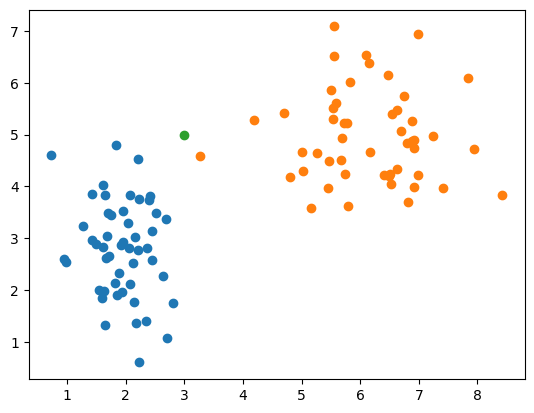

In [10]:
x, y = 3, 5
plt.scatter(x_blue, y_blue)
plt.scatter(x_red, y_red)
plt.scatter(x, y)

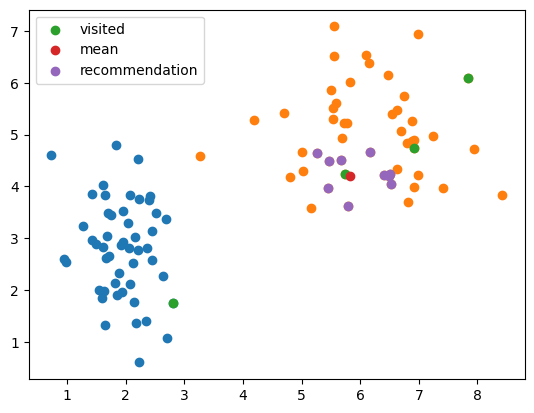

In [11]:
model = RecommendationSystem(10)
data = np.vstack([points_blue, points_red])

visited_indexes = np.random.choice([i for i in range(len(data))], size=4)
visited_data = np.array([data[i] for i in visited_indexes])
x_visited, y_visited = np.array([x[0] for x in visited_data]), np.array([x[1] for x in visited_data])

model.fit(visited_data, data)
mean_object = model.get_mean(visited_data)
prediction = model.predict()
x_n, y_n = np.array([x[0] for x in prediction]), np.array([x[1] for x in prediction])

plt.scatter(x_blue, y_blue)
plt.scatter(x_red, y_red)
plt.scatter(x_visited, y_visited, label='visited')
plt.scatter(mean_object[0], mean_object[1], label='mean')
plt.scatter(x_n, y_n, label='recommendation')
plt.legend(loc=0)

## Experiment with real data

In [33]:
import pandas as pd

df1 = pd.read_csv('apartments_domovita_1_room.csv')
df2 = pd.read_csv('apartments_domovita_2_room.csv')
df3 = pd.read_csv('apartments_domovita_3_room.csv')
dataframe = pd.concat([df1, df2, df3], ignore_index=True)
dataframe

,Adress,District,Price,Price_square_meter,Rooms,Area,Floor,Metro_station,Walking_time,Transport_time
0,"1-комнатная квартира, Минск, ул. Сергея Есенин...",Московский район,164917,4892,1,33.7,3,NaN,NaN,NaN
1,"1-комнатная квартира, Минск, ул. Голодеда, д. 11",Заводской район,227674,6837,1,33.3,7,NaN,NaN,NaN
2,"1-комнатная квартира, Минск, ул. Германовская,...",Октябрьский район,248106,5865,1,42.3,10,Аэродромная,12.0,7.0
3,"1-комнатная квартира, Минск, ул. Тухачевского,...",Заводской район,218538,4856,1,45.0,5,Партизанская,12.0,6.0
4,"1-комнатная квартира, Минск, пр-т Дзержинского...",Московский район,318160,7198,1,44.2,19,Малиновка,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...
16320,"3-комнатная квартира, Минск, ул. Игоря Лученка...",Октябрьский район,346941,5296,3,65.5,13,Аэродромная,9.0,5.0
16321,"3-комнатная квартира, Минск, ул. Игоря Лученка...",Октябрьский район,344292,5296,3,65.0,12,Аэродромная,9.0,5.0
16322,"3-комнатная квартира, Минск, ул. Игоря Лученка...",Октябрьский район,346941,5296,3,65.5,3,Аэродромная,9.0,5.0
16323,"3-комнатная квартира, Минск, ул. Игоря Лученка...",Октябрьский район,347471,5296,3,65.6,9,Аэродромная,9.0,5.0


In [34]:
df = dataframe.drop_duplicates()
low_price_df = df.query("Area < 60 and Area > 50")[['Price', 'Price_square_meter', 'Area', 'Floor']]
visited = low_price_df[: 10]

## <div style= "color: red;">Bad example. Without data scaling</div>

In [35]:
model = RecommendationSystem(20)
model.fit(np.array(visited), np.array(df[['Price', 'Price_square_meter', 'Area', 'Floor']]))
recommendation = pd.DataFrame(model.predict())
recommendation

,0,1,2,3
0,303777.0,5775.0,52.60,1.0
1,303777.0,5775.0,52.60,1.0
2,303777.0,5775.0,52.60,1.0
3,303777.0,5775.0,52.60,1.0
4,304266.0,5837.0,52.12,2.0
5,303565.0,5814.0,52.20,9.0
6,303777.0,6219.0,48.84,1.0
7,303565.0,5093.0,59.60,2.0
8,304310.0,4920.0,61.84,3.0
9,303199.0,5775.0,52.50,1.0


In [36]:
recommendation_indexes = model.predict(indexes=True)
prediction = pd.DataFrame()
for index in recommendation_indexes:
    prediction = pd.concat([prediction, df[index:index + 1]], ignore_index=True)
prediction.head()

,Adress,District,Price,Price_square_meter,Rooms,Area,Floor,Metro_station,Walking_time,Transport_time
0,"2-комнатная квартира, Минск, ул. Лейтенанта Ки...",Октябрьский район,303777,5775,2,52.60,1,Аэродромная,11.0,6.0
1,"2-комнатная квартира, Минск, ул. Лейтенанта Ки...",Октябрьский район,303777,5775,2,52.60,1,Аэродромная,11.0,6.0
2,"2-комнатная квартира, Минск, ул. Лейтенанта Ки...",Октябрьский район,303777,5775,2,52.60,1,Аэродромная,11.0,6.0
3,"2-комнатная квартира, Минск, ул. Лейтенанта Ки...",Октябрьский район,303777,5775,2,52.60,1,Аэродромная,11.0,6.0
4,"2-комнатная квартира, Минск, ул. Нововиленская...",Центральный район,304266,5837,2,52.12,2,NaN,NaN,NaN


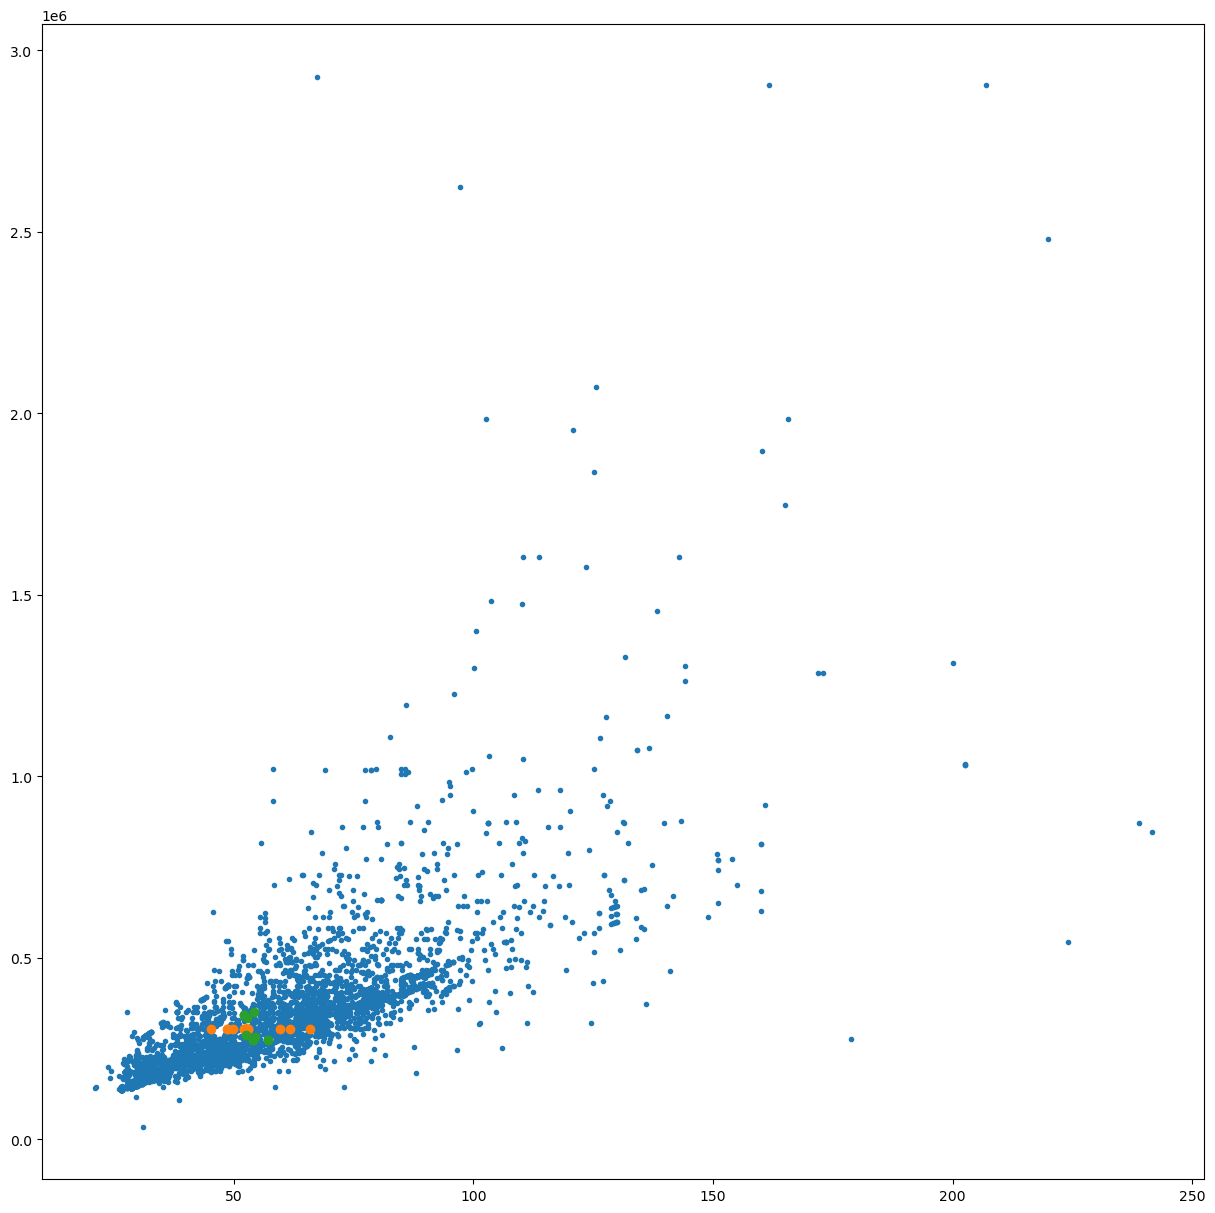

In [39]:
plt.figure(figsize=(15, 15))
plt.scatter(df.Area, df.Price, marker='.')
plt.scatter(prediction.Area, prediction.Price)
plt.scatter(visited.Area, visited.Price)

#### <div style= "color: red;">We can see some strange result, which shows us importance of data scaling. Feature "Price" has the biggest scale, so it makes biggest contribution</div>

## <div style= "color: green;">Good example. With data scaling</div>

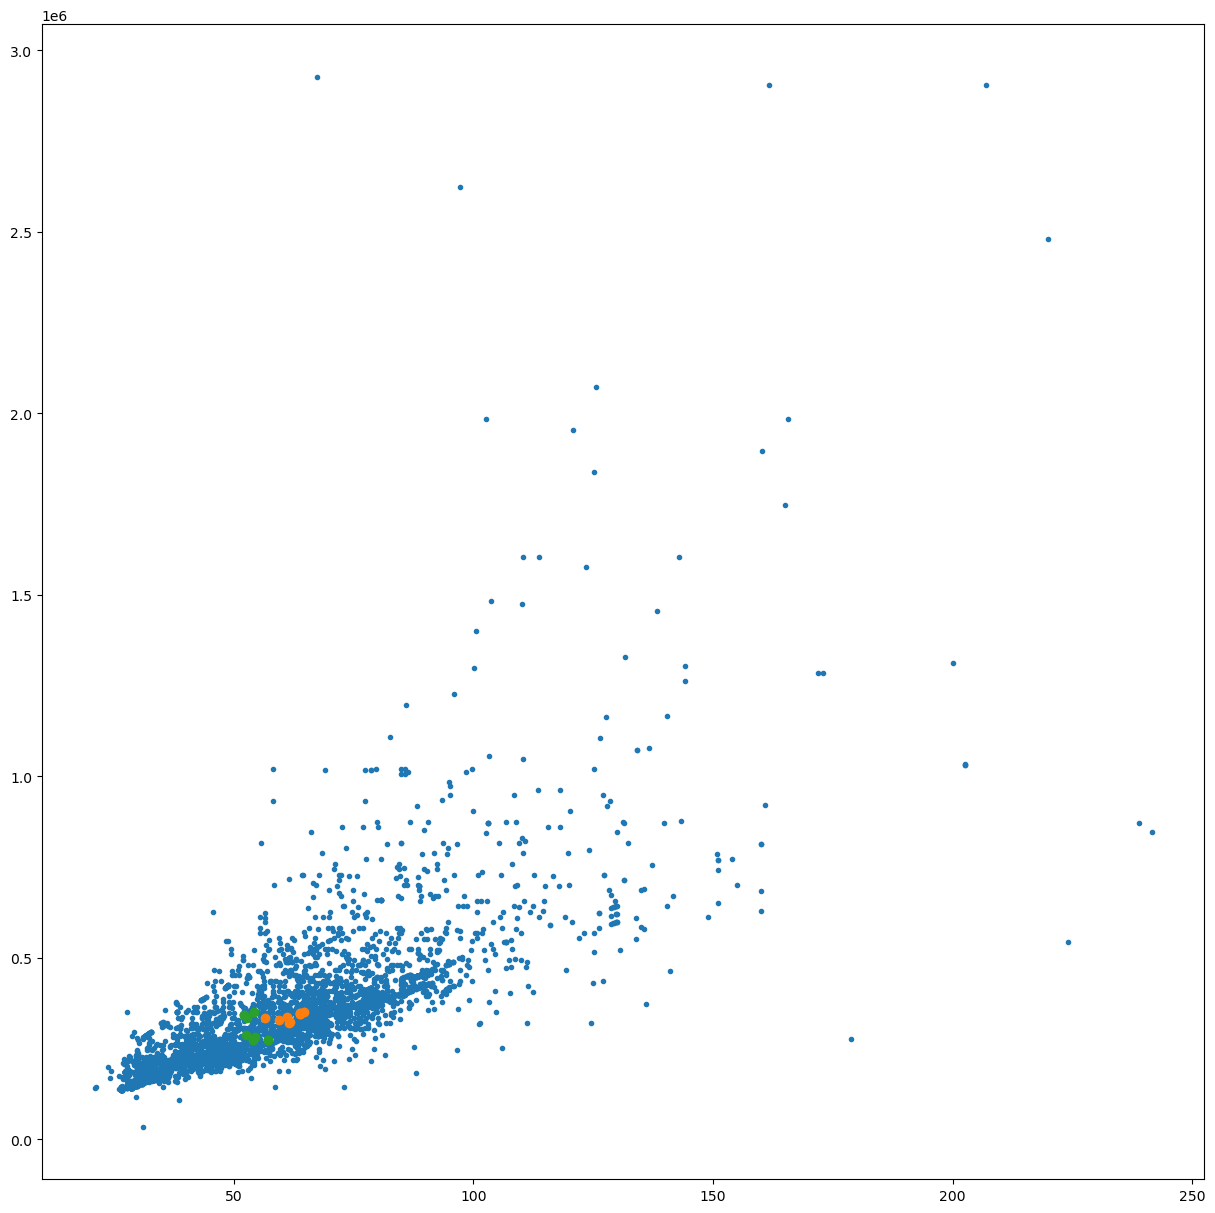

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Price', 'Price_square_meter', 'Area', 'Floor']])
visited_scaled = scaler.fit_transform(visited)

model = RecommendationSystem(10)
model.fit(np.array(visited_scaled), np.array(df_scaled))
recommendation_indexes = model.predict(indexes=True)

prediction = pd.DataFrame()
for index in recommendation_indexes:
    prediction = pd.concat([prediction, df[index:index + 1]], ignore_index=True)


plt.figure(figsize=(15, 15))
plt.scatter(df.Area, df.Price, marker='.')
plt.scatter(prediction.Area, prediction.Price)
plt.scatter(visited.Area, visited.Price)

## Algorithm visualization in 3D feature space

In [21]:
def point_generate_3d():
    cluster1_x = np.random.normal(2, 4, 50)
    cluster1_y = np.random.normal(3, 1, 50)
    cluster1_z = np.random.normal(4, 1, 50)

    cluster2_x = np.random.normal(5, 4, 50)
    cluster2_y = np.random.normal(6, 1, 50)
    cluster2_z = np.random.normal(7, 1, 50)
    result1 = np.array([[x, y, z] for x, y, z in zip(cluster1_x, cluster1_y, cluster1_z)])
    result2 = np.array([[x, y, z] for x, y, z in zip(cluster2_x, cluster2_y, cluster2_z)])
    return result1, result2

def without_visited(data, visited):
        visited_set = set([str(x) for x in visited])
        data_without_visited = np.array([x for x in data if str(x) not in visited_set])
        return data_without_visited

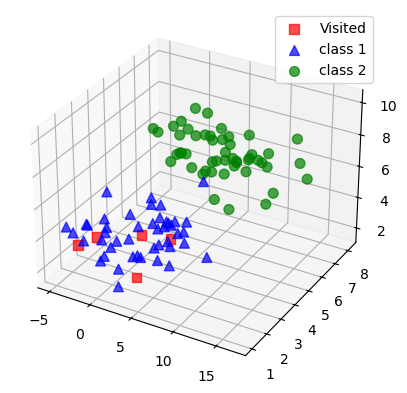

In [30]:
points_blue, points_red = point_generate_3d()
visited = np.array(points_blue[[1, 4, 5, 9, 2]])
x_v, y_v, z_v = np.array([x[0] for x in visited]), np.array([x[1] for x in visited]), np.array([x[2] for x in visited])
points_blue = without_visited(points_blue, visited)
x_b, y_b, z_b = np.array([x[0] for x in points_blue]), np.array([x[1] for x in points_blue]), np.array([x[2] for x in points_blue])
x_r, y_r, z_r = np.array([x[0] for x in points_red]), np.array([x[1] for x in points_red]), np.array([x[2] for x in points_red])




fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x_v, y_v, z_v, c='red', marker='s', s=50, label='Visited', alpha=0.7)
ax.scatter(x_b, y_b, z_b, c='blue', marker='^', s=50, label='class 1', alpha=0.7)
ax.scatter(x_r, y_r, z_r, c='green', marker='o', s=50, label='class 2', alpha=0.7)

ax.legend()

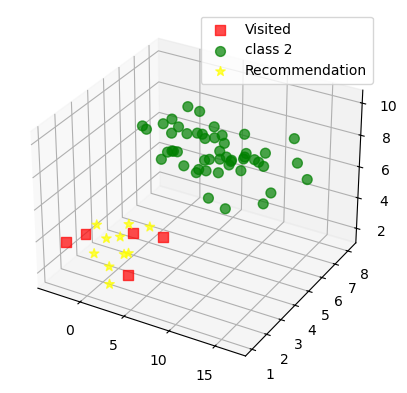

In [31]:
model = RecommendationSystem(10)
dataset = np.vstack([points_blue, points_red])

model.fit(visited, dataset)
prediction = model.predict()
x_p, y_p, z_p = np.array([x[0] for x in prediction]), np.array([x[1] for x in prediction]), np.array([x[2] for x in prediction])


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x_v, y_v, z_v, c='red', marker='s', s=50, label='Visited', alpha=0.7)
#ax.scatter(x_b, y_b, z_b, c='blue', marker='^', s=50, label='Blue', alpha=0.7)
ax.scatter(x_r, y_r, z_r, c='green', marker='o', s=50, label='class 2', alpha=0.7)
ax.scatter(x_p, y_p, z_p, c='yellow', marker='*', s=50, label='Recommendation', alpha=0.7)

ax.legend()